In [86]:
# noinspection PyUnresolvedReferences
import cv2 as cv
import numpy as np
# noinspection PyUnresolvedReferences
import matplotlib.pyplot as plt

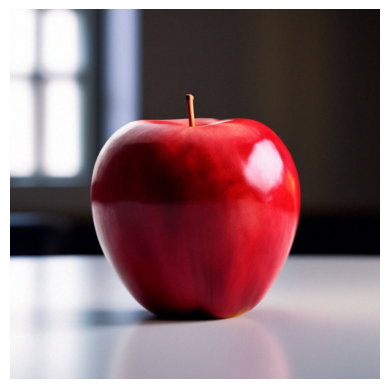

In [87]:
appleImage = cv.cvtColor(cv.imread('apple.jpg'), cv.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(appleImage)
plt.show()

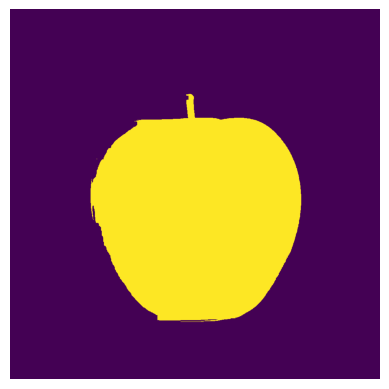

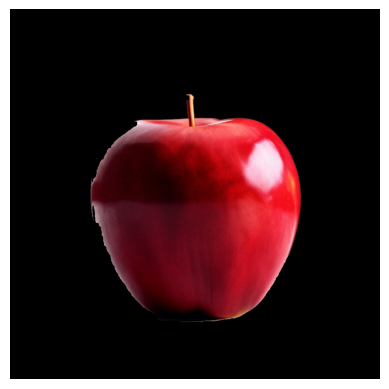

In [88]:
#GrabCut
appleMask = np.zeros(appleImage.shape[:2], np.uint8)
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)
x = 217
y = 226
width = 590
height = 640
rect = (x, y, width, height)
cv.grabCut(appleImage, appleMask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)
appleMask2 = np.where((appleMask==2)|(appleMask==0),0,1).astype('uint8')
resultAppleImage = appleImage*appleMask2[:,:,np.newaxis]
plt.axis("off"); plt.imshow(appleMask2); plt.show()
plt.axis("off"); plt.imshow(resultAppleImage); plt.show()

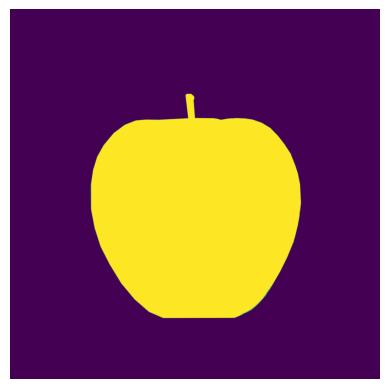

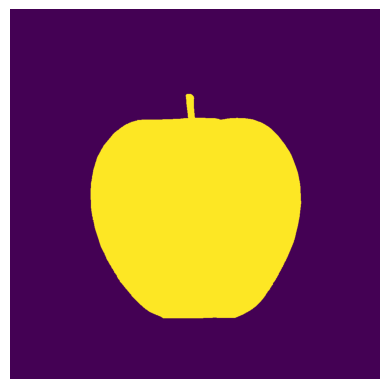

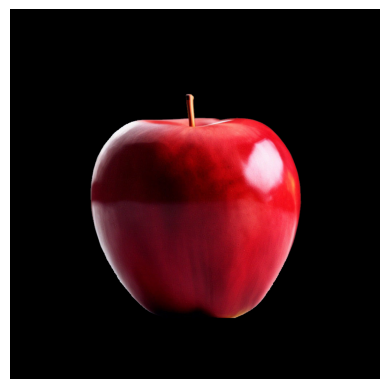

In [89]:
newAppleMask = cv.imread('apple_mask.png', cv.IMREAD_GRAYSCALE)
appleMask[newAppleMask==0] = 0
appleMask[newAppleMask==255] = 1
appleMask, bgdModel, fgdModel = cv.grabCut(appleImage, appleMask, None, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_MASK)
appleMask = np.where((appleMask == 2)|(appleMask == 0), 0, 1).astype('uint8')
appleMask = (appleMask*255).astype('uint8')
resultAppleImage = cv.bitwise_and(appleImage, appleImage, mask=appleMask) #?
plt.axis("off"); plt.imshow(newAppleMask); plt.show()
plt.axis("off"); plt.imshow(appleMask); plt.show()
plt.axis("off"); plt.imshow(resultAppleImage); plt.show()

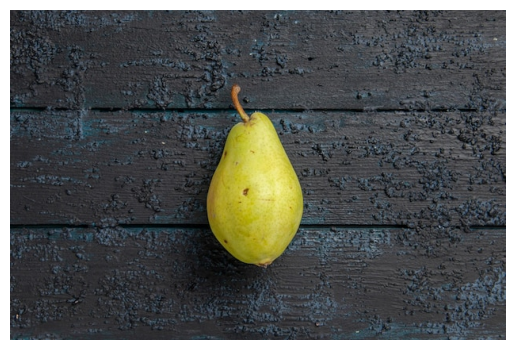

In [90]:
pearImage = cv.cvtColor(cv.imread('pear.jpg'), cv.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(pearImage)
plt.show()

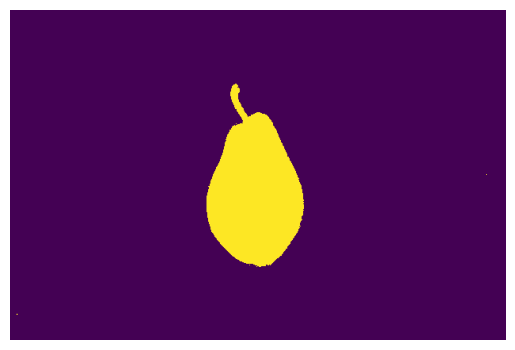

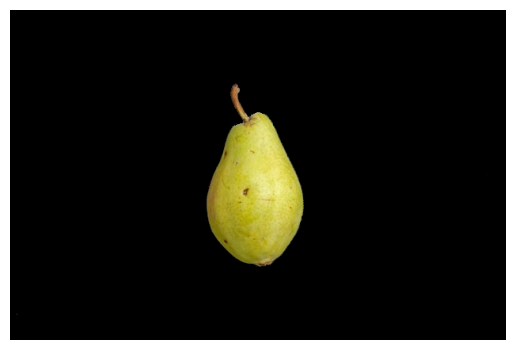

In [91]:
pearImageHSV = cv.cvtColor(pearImage, cv.COLOR_BGR2HSV)
lowerGreen = (39, 78, 30)
upperGreen = (255,255,255)
pearGreenMask = cv.inRange(pearImageHSV, lowerGreen, upperGreen)
resultPearImage = cv.bitwise_and(pearImage, pearImage, mask=pearGreenMask)
plt.axis("off"); plt.imshow(pearGreenMask); plt.show()
plt.axis("off"); plt.imshow(resultPearImage); plt.show()

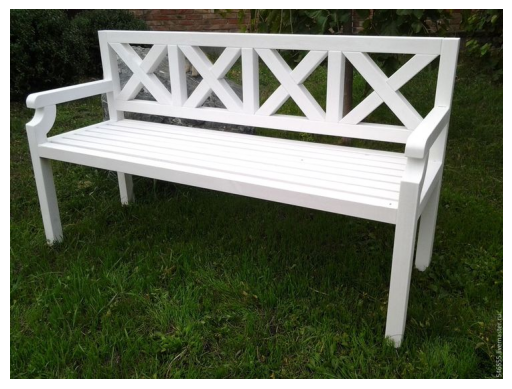

In [92]:
benchImage = cv.cvtColor(cv.imread('bench.jpg'), cv.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(benchImage)
plt.show()

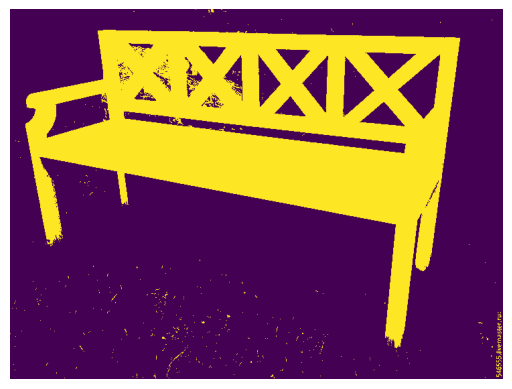

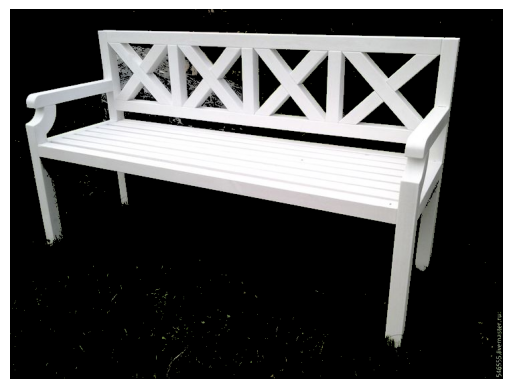

In [93]:
#Бинарная маска
grayBenchImage = cv.cvtColor(benchImage, cv.COLOR_RGB2GRAY)
_, benchMask = cv.threshold(grayBenchImage, 100, 255, cv.THRESH_BINARY)
plt.axis("off"); plt.imshow(benchMask); plt.show()
resultBenchImage = cv.bitwise_and(benchImage, benchImage, mask=benchMask)
plt.axis("off"); plt.imshow(resultBenchImage); plt.show()

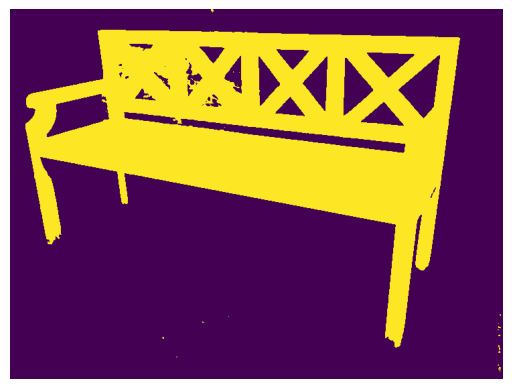

In [94]:
blurBenchImage = cv.GaussianBlur(grayBenchImage, (5,5), 0)
_, benchMaskBlur = cv.threshold(blurBenchImage, 100, 255, cv.THRESH_BINARY)
plt.axis("off"); plt.imshow(benchMaskBlur); plt.show()

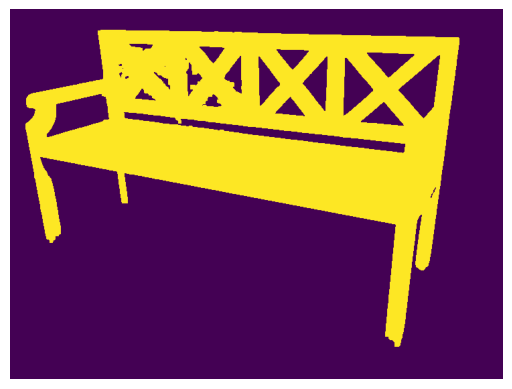

In [95]:
kernelOpen = np.ones((5,5), np.uint8)
benchMaskOpen = cv.morphologyEx(benchMaskBlur, cv.MORPH_OPEN, kernelOpen)
plt.axis("off"); plt.imshow(benchMaskOpen); plt.show()

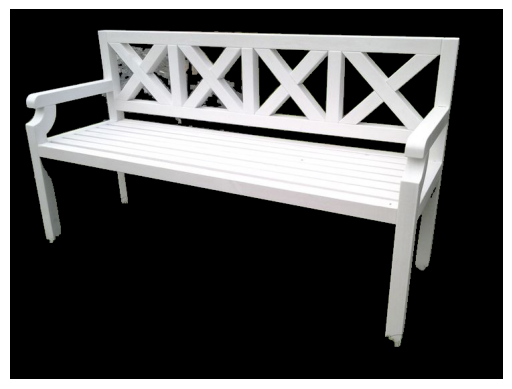

In [96]:
resultBenchClean = cv.bitwise_and(benchImage, benchImage, mask=benchMaskOpen)
plt.axis("off"); plt.imshow(resultBenchClean); plt.show()

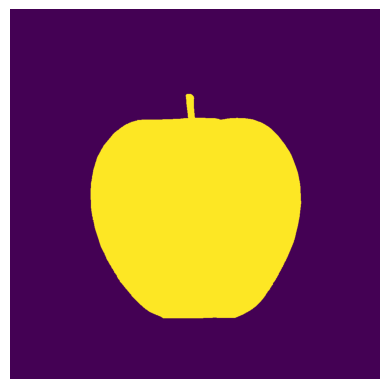

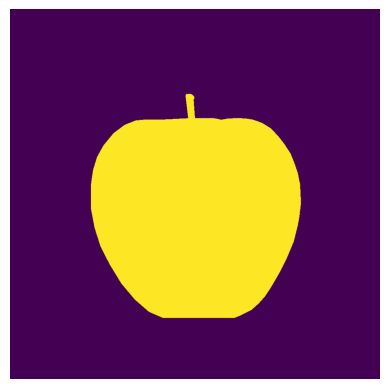

Коэффициент Дайса для яблока: 0.9983443250217342


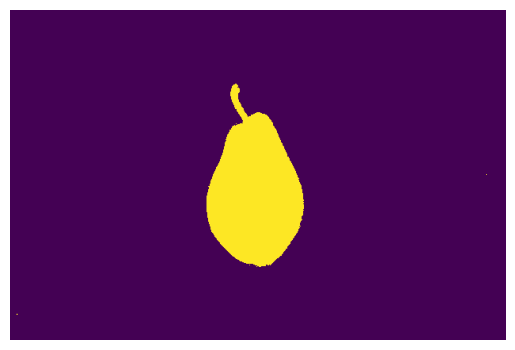

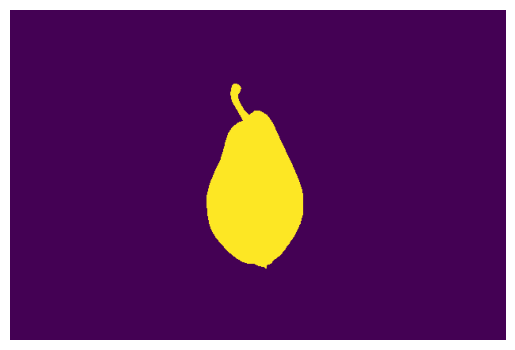

Коэффициент Дайса для груши: 0.9910313901345291


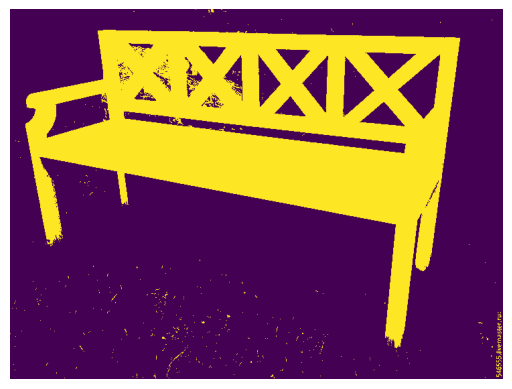

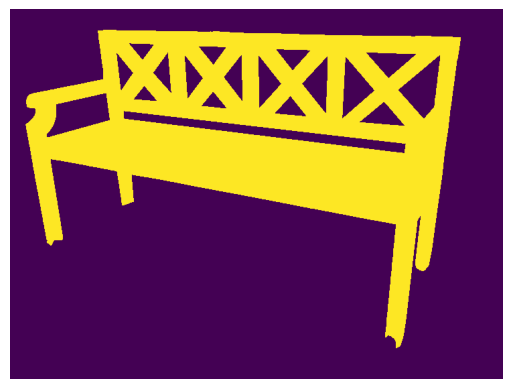

Коэффициент Дайса для лавочки: 0.9769708918645089


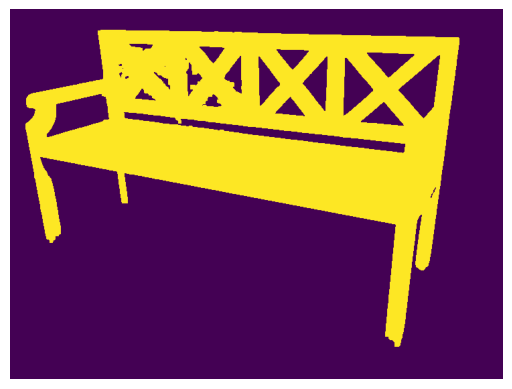

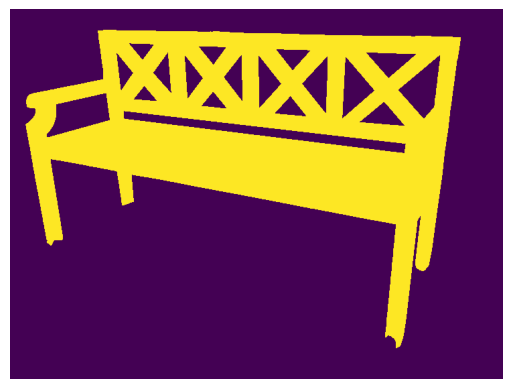

Коэффициент Дайса для лавочки (улучшенная): 0.977330664206065


In [97]:
def Dice(autoMask, manualMaskPath, name):
    manualMask = cv.imread(manualMaskPath, cv.IMREAD_GRAYSCALE)
    _, manualMask = cv.threshold(manualMask, 127, 255, cv.THRESH_BINARY)
    intersection = np.sum((autoMask == 255) & (manualMask == 255))
    dice = 2.0 * intersection / (np.sum(autoMask == 255) + np.sum(manualMask == 255))
    plt.axis("off"); plt.imshow(autoMask); plt.show()
    plt.axis("off"); plt.imshow(manualMask); plt.show()
    print(f"Коэффициент Дайса для {name}:", dice)

Dice(appleMask, "apple_mask.png", "яблока")
Dice(pearGreenMask, "pear_mask.png", "груши")
Dice(benchMask, "bench_mask.png", "лавочки")
Dice(benchMaskOpen, "bench_mask.png", "лавочки (улучшенная)")